In [1]:
import numpy as np
from matplotlib import rcParams, pyplot as plt
import seaborn
%matplotlib inline

rcParams["figure.figsize"] = (10,6)

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Fully-Connected MNIST

In [2]:
sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

sess.run(tf.global_variables_initializer())

y = tf.matmul(x,W) + b

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

fc_loss = []
fc_train_acc = []
fc_test_acc = []
for _ in range(1000):
    batch = mnist.train.next_batch(100)
    _, a = sess.run([train_step, accuracy], feed_dict={x: batch[0], y_: batch[1]})

    fc_train_acc.append(a)
    fc_test_acc.append(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
    
print "Final Test Accuracy:", accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})

Final Test Accuracy: 0.917


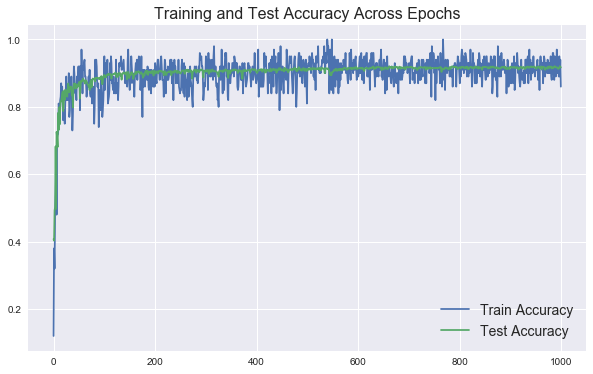

In [3]:
plt.plot(fc_train_acc, label="Train Accuracy")
plt.plot(fc_test_acc, label="Test Accuracy")
plt.legend(loc='lower right', fontsize=14)
plt.title("Training and Test Accuracy Across Epochs", fontsize=16)
plt.show()

### Convolutional MNIST

In [4]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [5]:
# Reshape image
x_image = tf.reshape(x, [-1,28,28,1])

# Conv1
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# Conv2
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# FC1
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# FC2
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

# Result
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [6]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())

cnn_train_acc = []
cnn_test_acc = []
for i in range(20001):
    batch = mnist.train.next_batch(50)    
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
    
    if i % 100 == 0:
        train_acc = accuracy.eval(feed_dict={
            x:batch[0], y_: batch[1], keep_prob: 1.0})
    
        test_acc = accuracy.eval(feed_dict={
            x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})

        cnn_train_acc.append(train_acc)
        cnn_test_acc.append(test_acc)

    if i % 1000 == 0:
        print("step %d, training accuracy %g"%(i, train_acc))
    
print "Final test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})

step 0, training accuracy 0.08
step 1000, training accuracy 0.96
step 2000, training accuracy 0.98
step 3000, training accuracy 1
step 4000, training accuracy 1
step 5000, training accuracy 1
step 6000, training accuracy 1
step 7000, training accuracy 1
step 8000, training accuracy 1
step 9000, training accuracy 1
step 10000, training accuracy 1
step 11000, training accuracy 1
step 12000, training accuracy 1
step 13000, training accuracy 1
step 14000, training accuracy 1
step 15000, training accuracy 1
step 16000, training accuracy 1
step 17000, training accuracy 1
step 18000, training accuracy 1
step 19000, training accuracy 1
step 20000, training accuracy 1
Final test accuracy 0.9933


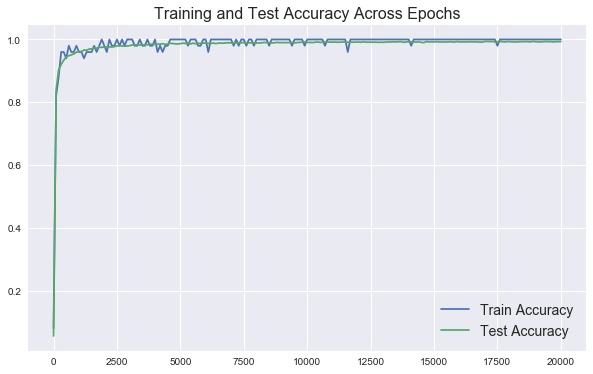

In [7]:
plt.plot(100*np.arange(len(cnn_train_acc)), cnn_train_acc, label="Train Accuracy")
plt.plot(100*np.arange(len(cnn_test_acc)), cnn_test_acc, label="Test Accuracy")
plt.legend(loc='lower right', fontsize=14)
plt.title("Training and Test Accuracy Across Epochs", fontsize=16)
plt.show()